In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading the dataset

In [2]:
df = pd.read_csv(r'D:\Vs_Code_Directory\Python\Dataset\US_Accidents_March23.csv\US_Accidents_March23.csv')

In [3]:
# df['Start_Time'] = df['Start_Time'].str[:10]
#transforming the data type
df['Start_Date'] = pd.to_datetime(df['Start_Time'].str[:10])


In [4]:
# How many accidents in differnet years
df['Year'] = df['Start_Date'].dt.year
#Drop the rows where 2023 is not considering for analysis because it has inconsistent data
df = df[df['Year'] != 2023]

In [5]:
df.isnull().sum().sort_values(ascending=False)

End_Lat                  3402762
End_Lng                  3402762
Precipitation(in)        2192380
Wind_Chill(F)            1990741
Wind_Speed(mph)           563451
Visibility(mi)            170230
Wind_Direction            167423
Humidity(%)               167397
Weather_Condition         166830
Temperature(F)            157679
Pressure(in)              135013
Weather_Timestamp         114894
Airport_Code               21759
Sunrise_Sunset             21571
Civil_Twilight             21571
Nautical_Twilight          21571
Astronomical_Twilight      21571
Street                     10099
Timezone                    7579
Zipcode                     1856
City                         251
Description                    5
Roundabout                     0
Railway                        0
Stop                           0
Station                        0
Junction                       0
Traffic_Calming                0
Traffic_Signal                 0
Turning_Loop                   0
Start_Date

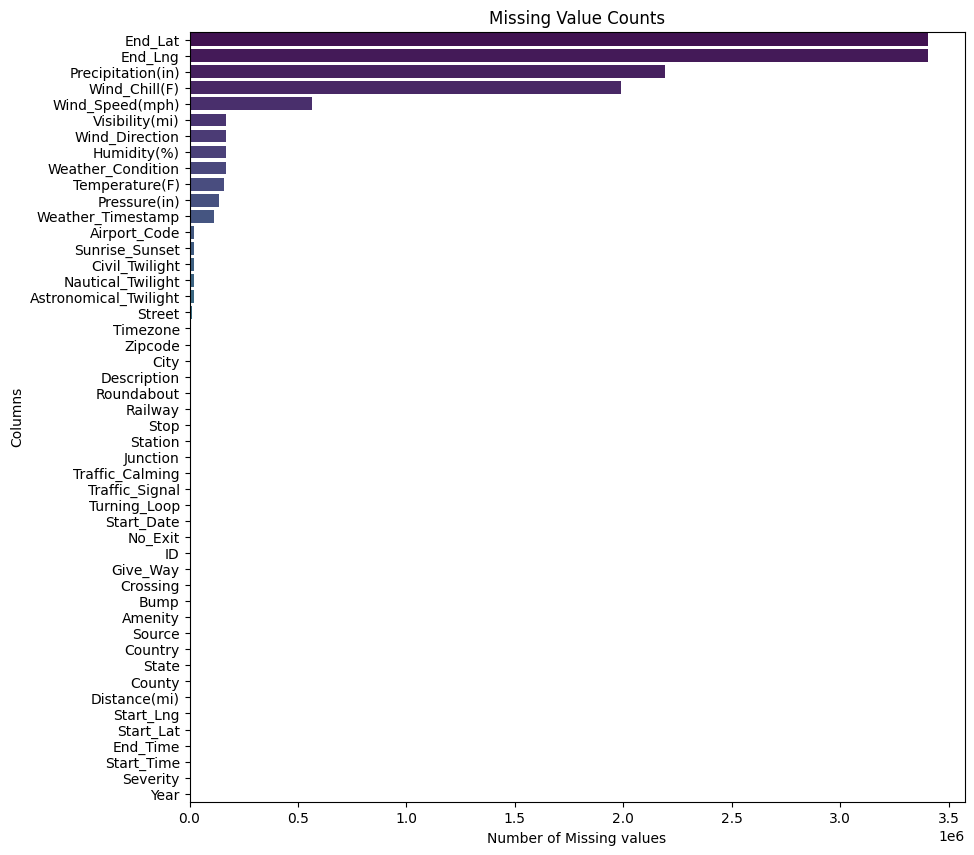

In [6]:
#Visualizing the missing values using seaborn
missing_values = df.isnull().sum().sort_values(ascending=False)
plt.figure(figsize=(10,10))
sns.barplot(x=missing_values,y=missing_values.index,palette='viridis')
plt.title('Missing Value Counts')
plt.xlabel('Number of Missing values')
plt.ylabel('Columns')
plt.show()

In [7]:
df['State'].unique()

array(['OH', 'WV', 'CA', 'FL', 'GA', 'SC', 'NE', 'IA', 'IL', 'MO', 'WI',
       'IN', 'MI', 'NJ', 'NY', 'CT', 'MA', 'RI', 'NH', 'PA', 'KY', 'MD',
       'VA', 'DC', 'DE', 'TX', 'WA', 'OR', 'AL', 'NC', 'AZ', 'TN', 'LA',
       'MN', 'CO', 'OK', 'NV', 'UT', 'KS', 'NM', 'AR', 'MS', 'ME', 'VT',
       'WY', 'ID', 'ND', 'MT', 'SD'], dtype=object)

In [8]:
#Defining the costal regions and Inland regions
Costal_regions = [
    'CA', 'FL', 'GA', 'SC', 'NJ', 'NY', 'CT', 'MA', 
    'RI', 'NH', 'MD', 'VA', 'DC', 'DE', 'AL', 'NC'
]
Inland_regions = [
    'OH', 'WV', 'NE', 'IA', 'IL', 'MO', 'WI', 'IN', 'MI', 
    'PA', 'KY', 'TX', 'WA', 'OR', 'TN', 'LA', 'MN', 'CO', 
    'OK', 'NV', 'UT', 'KS', 'NM', 'AR', 'MS', 'ME', 'VT', 
    'WY', 'ID', 'ND', 'MT', 'SD'
]

#Function to classify the region
def classify_region(state):
    if state in Costal_regions:
        return 'Costal_Region'
    elif state in Inland_regions:
        return 'Inland_Region'
    else :
        return 'Other'


In [9]:
df['Costal_or_Inland_Regions'] = df['State'].apply(classify_region)

In [10]:
#how many accidents in 'coastal_orinland_regions'
df_coastal_or_inland_regions = df.groupby(['Costal_or_Inland_Regions'])['Costal_or_Inland_Regions'].count()
print(df_coastal_or_inland_regions)

Costal_or_Inland_Regions
Costal_Region    4580470
Inland_Region    2736924
Other             164367
Name: Costal_or_Inland_Regions, dtype: int64


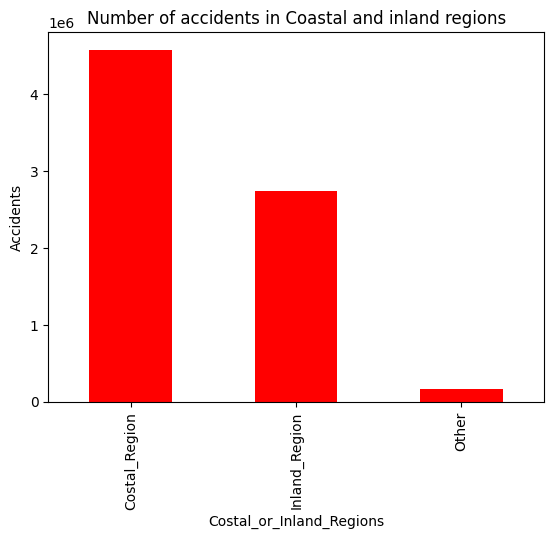

In [11]:
#Visualise how many accidents in 'Coastal region' or 'Inland region'
df_coastal_or_inland_regions.plot(kind='bar')
ax = df_coastal_or_inland_regions.plot(kind = 'bar', color = 'red')
plt.ylabel('Accidents')
plt.title('Number of accidents in Coastal and inland regions')
plt.show()

Coastal regions have a significantly higher number of total traffic accidents compared to inland regions, according to coastal and inland classification

Coastal regions have twice the number of traffic accidentscompared to inland regions

In [12]:
#printout all states
df['State'].unique()

array(['OH', 'WV', 'CA', 'FL', 'GA', 'SC', 'NE', 'IA', 'IL', 'MO', 'WI',
       'IN', 'MI', 'NJ', 'NY', 'CT', 'MA', 'RI', 'NH', 'PA', 'KY', 'MD',
       'VA', 'DC', 'DE', 'TX', 'WA', 'OR', 'AL', 'NC', 'AZ', 'TN', 'LA',
       'MN', 'CO', 'OK', 'NV', 'UT', 'KS', 'NM', 'AR', 'MS', 'ME', 'VT',
       'WY', 'ID', 'ND', 'MT', 'SD'], dtype=object)

In [13]:
# define west,middle and east states
west_states = ['CA', 'WA', 'OR', 'NV', 'ID', 'MT', 'WY', 'UT', 'CO', 'AZ', 'NM']
middle_states = ['ND', 'SD', 'NE', 'KS', 'OK', 'TX', 'MN', 'IA', 'MO', 'AR', 'LA']
east_states = ['ME', 'NH', 'VT', 'MA', 'RI', 'CT', 'NY', 'NJ', 'PA', 'DE', 'MD', 
'DC', 'WV', 'VA', 'KY', 'TN', 'NC', 'SC', 'GA', 'FL', 'AL', 'MS', 'OH', 'IN', 'MI', 
'WI', 'IL']

In [14]:
def classify_state(state):
    if state in west_states:
        return 'West'
    elif state in middle_states:
        return 'Middle'
    elif state in east_states:
        return 'East'
    else:
        return 'Unknown'
# Create 'location' column
df['Location'] = df['State'].apply(classify_state)

In [15]:
#how many accidents in locations
df_locations = df.groupby(['Location'])['Location'].count()
print(df_locations)

Location
East      3961037
Middle    1156600
West      2364124
Name: Location, dtype: int64


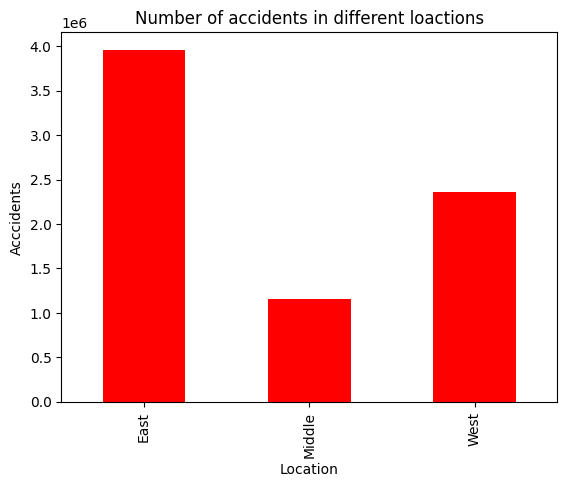

In [16]:
#Visualise how many accidents in locations
df_locations.plot(kind = 'bar')
ax = df_locations.plot(kind = 'bar', color = 'red')
plt.ylabel('Acccidents')
plt.title('Number of accidents in different loactions')
plt.show()

East regions has the highest number of accidents followed by the west regions, and then the middle region, according to east, west and middle classification.

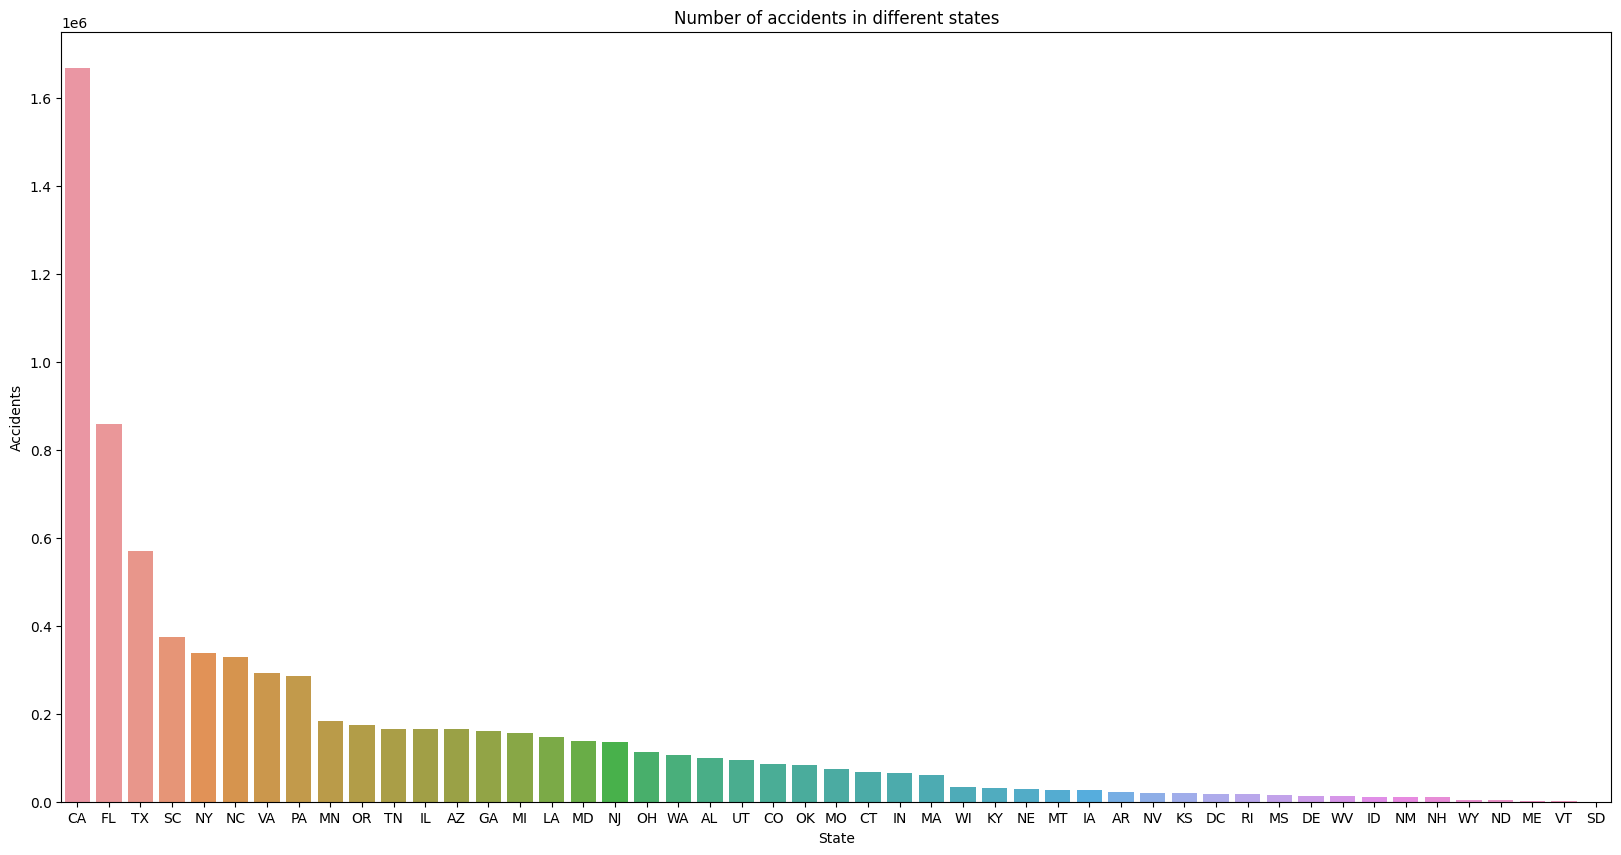

In [17]:
#How many accidents in states
df_states = df.groupby(['State'])['State'].count().sort_values(ascending = False)
plt.figure(figsize = (20,10))
ax=sns.barplot(x=df_states.index,y=df_states)
plt.ylabel('Accidents')
plt.title('Number of accidents in different states')
plt.show()

CA, FL, TX, SC, NY are top five states with the highest accident number.

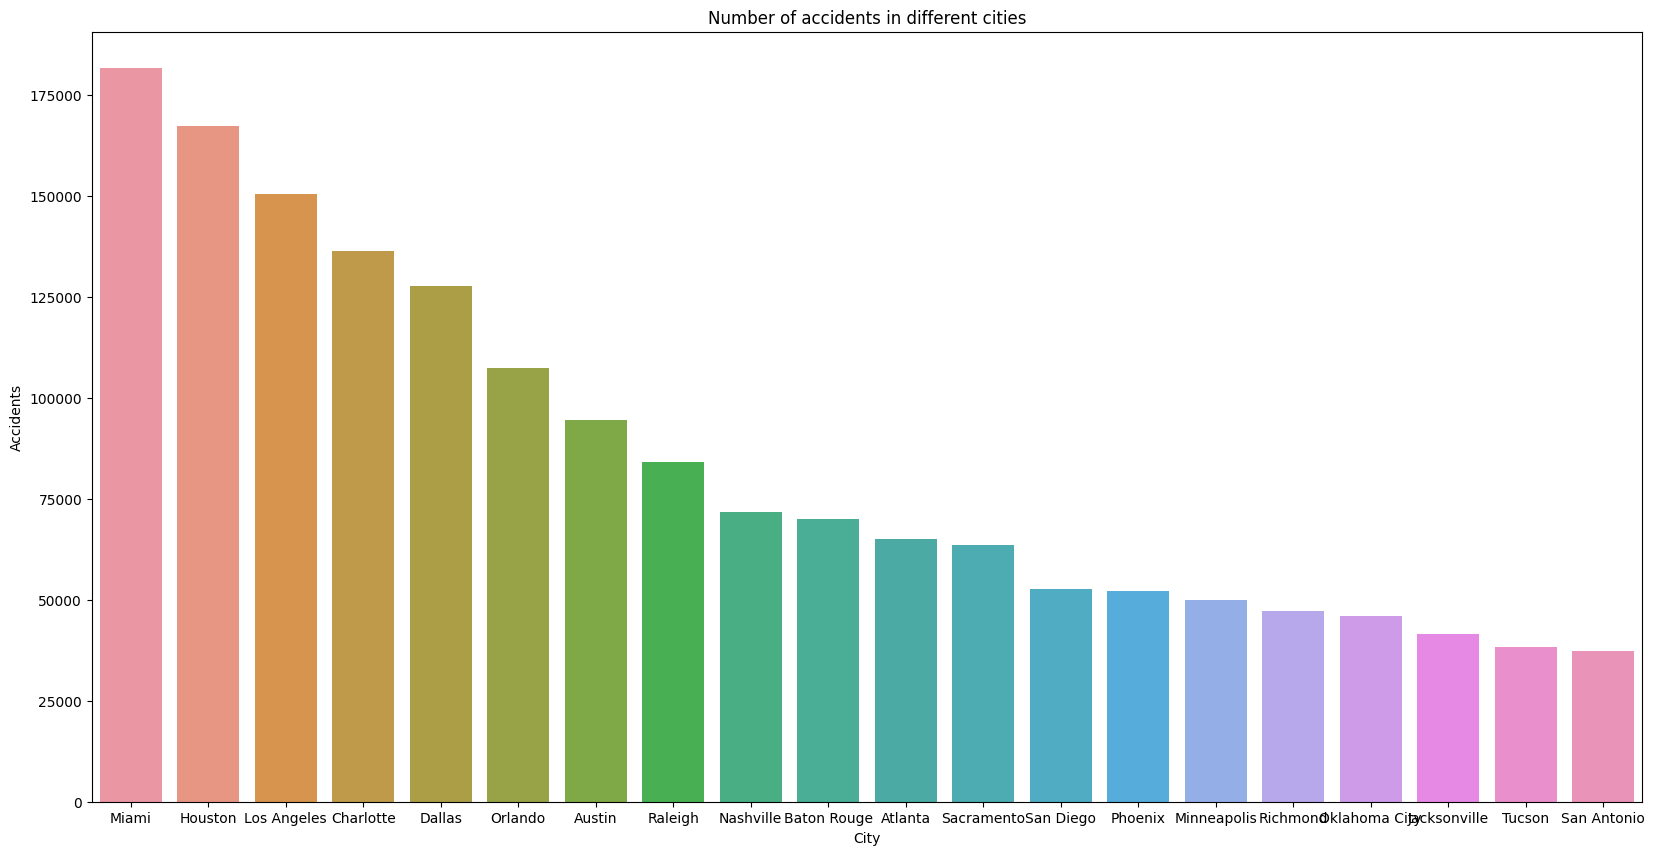

In [18]:
df_city = df.groupby(['City'])['City'].count().sort_values(ascending = False)
#selecting top 20 city 
df_first_20_city = df_city.iloc[:20]
plt.figure(figsize=(20,10))
ax = sns.barplot(x = df_first_20_city.index, y = df_first_20_city)
plt.ylabel('Accidents')
plt.title('Number of accidents in different cities')
plt.show()


Miami, Houston, Los Angeles, Charlotte, Dallas are top five cities with the highest accident number.

Year
2016     410821
2017     718093
2018     893426
2019     954303
2020    1178913
2021    1563753
2022    1762452
Name: Year, dtype: int64


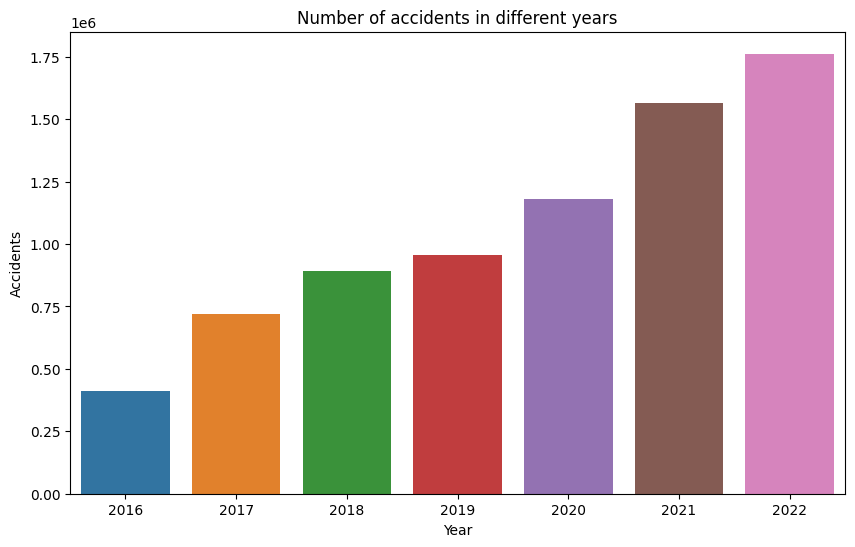

In [19]:
#how many accidents in different years
df_year = df.groupby(['Year'])['Year'].count().sort_values(ascending = True)
print(df_year)

#Visualise how many accidents in years
plt.figure(figsize=(10,6))
ax = sns.barplot(x = df_year.index, y = df_year)
plt.ylabel('Accidents')
plt.title('Number of accidents in different years')
plt.show()

Year
2016      NaN
2017    74.79
2018    24.42
2019     6.81
2020    23.54
2021    32.64
2022    12.71
Name: Year, dtype: float64


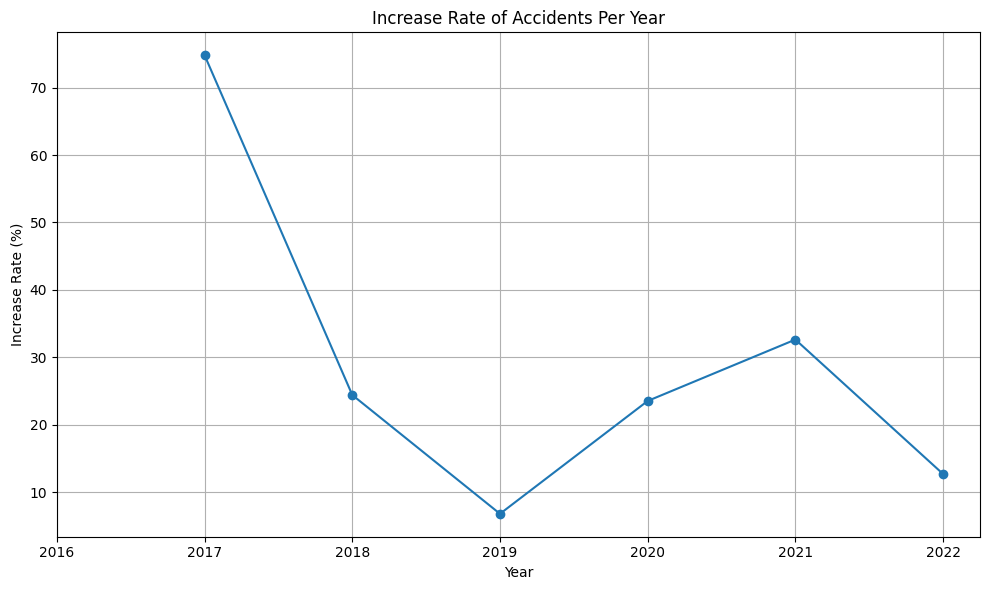

29.15

In [20]:
#Calculating the increase rate for each year
df_increase_rate = df_year.pct_change() * 100
#Round increase rate calues to two decimal places
df_increase_rate = df_increase_rate.round(2)
print(df_increase_rate)

#visualize increase rate by line chart
plt.figure(figsize=(10,6))
plt.plot(df_increase_rate.index, df_increase_rate.values,marker = 'o')
plt.title('Increase Rate of Accidents Per Year')
plt.xlabel('Year')
plt.ylabel('Increase Rate (%)')
plt.grid(True)
plt.xticks(df_increase_rate.index)
plt.tight_layout()
plt.show()

# Calculate the average increase yearly
average_increase = df_increase_rate.mean()
average_increase = average_increase.round(2)
average_increase

The figure for accidents increases from 410821 in 2016 to 1762452 in 2022.
In 2017, there was a significant increase of 74.79%, suggesting a notable increase compared to 2016.
The average yearly increase of accidents in US is 29.15% from 2016 to 2022.


In [21]:
df['Month'] = df['Start_Date'].dt.month 
df_months = df.groupby(['Month'])['Month'].count().sort_values(ascending=False)
print(df_months)



Month
12    847343
11    760165
10    675130
9     651381
2     603452
8     599666
1     591032
4     587300
6     571373
5     558176
3     524408
7     512335
Name: Month, dtype: int64


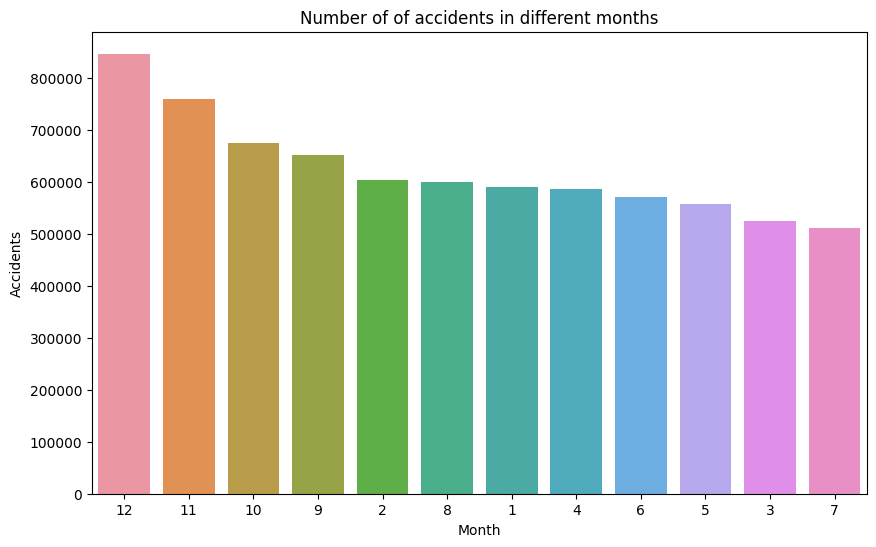

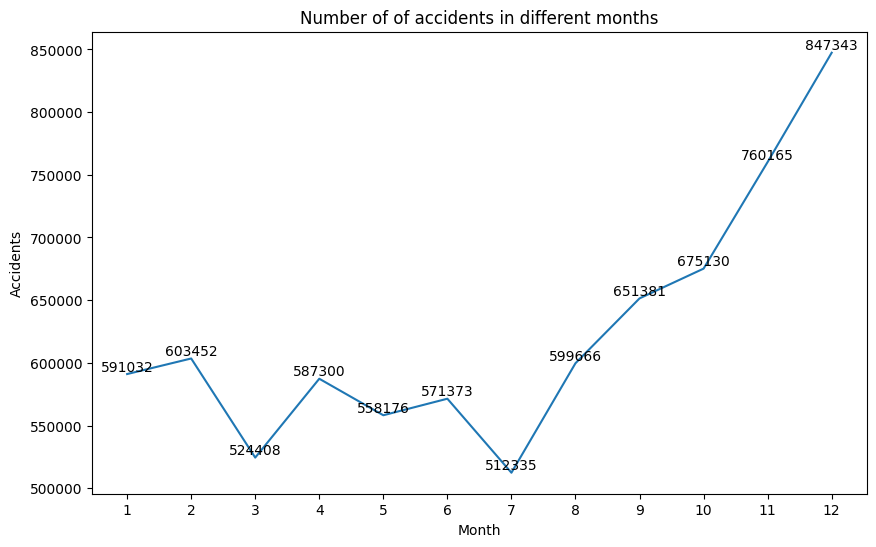

In [22]:
plt.figure(figsize=(10, 6))
# Use order to sort df_months.index in sns.barplot
ax = sns.barplot(x=df_months.index, y=df_months.values, order=df_months.index)
plt.ylabel('Accidents')
plt.title("Number of of accidents in different months")
plt.show()

plt.figure(figsize=(10, 6))
# Use order to sort df_months.index in sns.barplot
ax = sns.lineplot(x=df_months.index, y=df_months.values)
plt.ylabel('Accidents')
plt.title("Number of of accidents in different months")
# Set x-axis ticks to show all months
plt.xticks(df_months.index)  

# Show data points with exact values
for x, y in zip(df_months.index, df_months.values):
    ax.text(x, y, str(y), ha='center', va='bottom')
plt.show()

December,November and October have relatively large numbers of accidents.
April,June and May have relatively small numbers of accidents.

In [23]:
# how many accidents in different weekdays
df['Weekday'] = df['Start_Date'].dt.weekday 
df11 = df.groupby(['Weekday'])['Weekday'].count().sort_values(ascending=False)
print(df11)

Weekday
4    1326626
3    1278055
2    1272842
1    1249508
0    1174058
5     645655
6     535017
Name: Weekday, dtype: int64


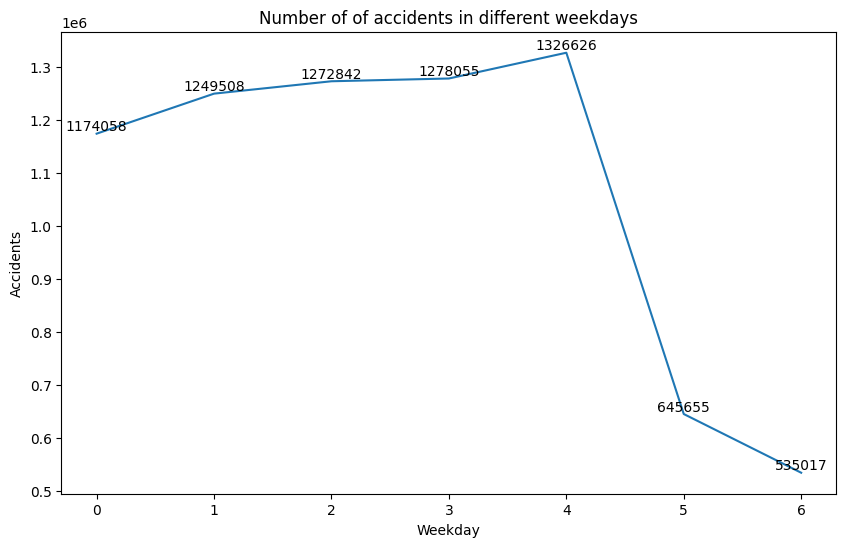

In [24]:
#notice: Monday=0, Sunday=6 in pandas 
plt.figure(figsize=(10, 6))
# Use order to sort df11.index in sns.barplot
ax = sns.lineplot(x=df11.index, y=df11.values)
plt.ylabel('Accidents')
plt.title("Number of of accidents in different weekdays")
# Set x-axis ticks to show all weekdays
plt.xticks(df11.index)  

# Show data points with exact values
for x, y in zip(df11.index, df11.values):
    ax.text(x, y, str(y), ha='center', va='bottom')
plt.show()

Weekdays has accident numbers that are twice as high as those during the weekend.

In [25]:
# how many accidents in different hours
df['Hours'] = df['Start_Time'].str[12:15] 
df13 = df.groupby(['Hours'])['Hours'].count()
print(df13)

Hours
0:0    109075
0:1    110091
0:2    109625
0:3    110426
0:4    109798
0:5    109045
1:0     99223
1:1    103195
1:2    103299
1:3    104247
1:4    107254
1:5    105055
2:0     91008
2:1     98852
2:2    100300
2:3    101765
2:4    102137
2:5    100525
3:0     91873
3:1     96864
3:2     98611
3:3     99478
3:4     99920
3:5     98591
4:0    100287
4:1     95307
4:2     94348
4:3     97239
4:4    101155
4:5    100791
5:0    103264
5:1    114473
5:2    118222
5:3    124008
5:4    133480
5:5    135186
6:0    141362
6:1    153053
6:2    156399
6:3    162352
6:4    170380
6:5    173059
7:0    171296
7:1    183915
7:2    188441
7:3    193820
7:4    195332
7:5    196535
8:0    181981
8:1    176739
8:2    166139
8:3    157358
8:4    153215
8:5    145147
9:0    109729
9:1    109628
9:2    107783
9:3    104718
9:4    102843
9:5    102520
Name: Hours, dtype: int64


In [26]:
df['Start_Time'].str[12:13].unique()

array(['5', '6', '7', '8', '9', '0', '1', '2', '4', '3'], dtype=object)

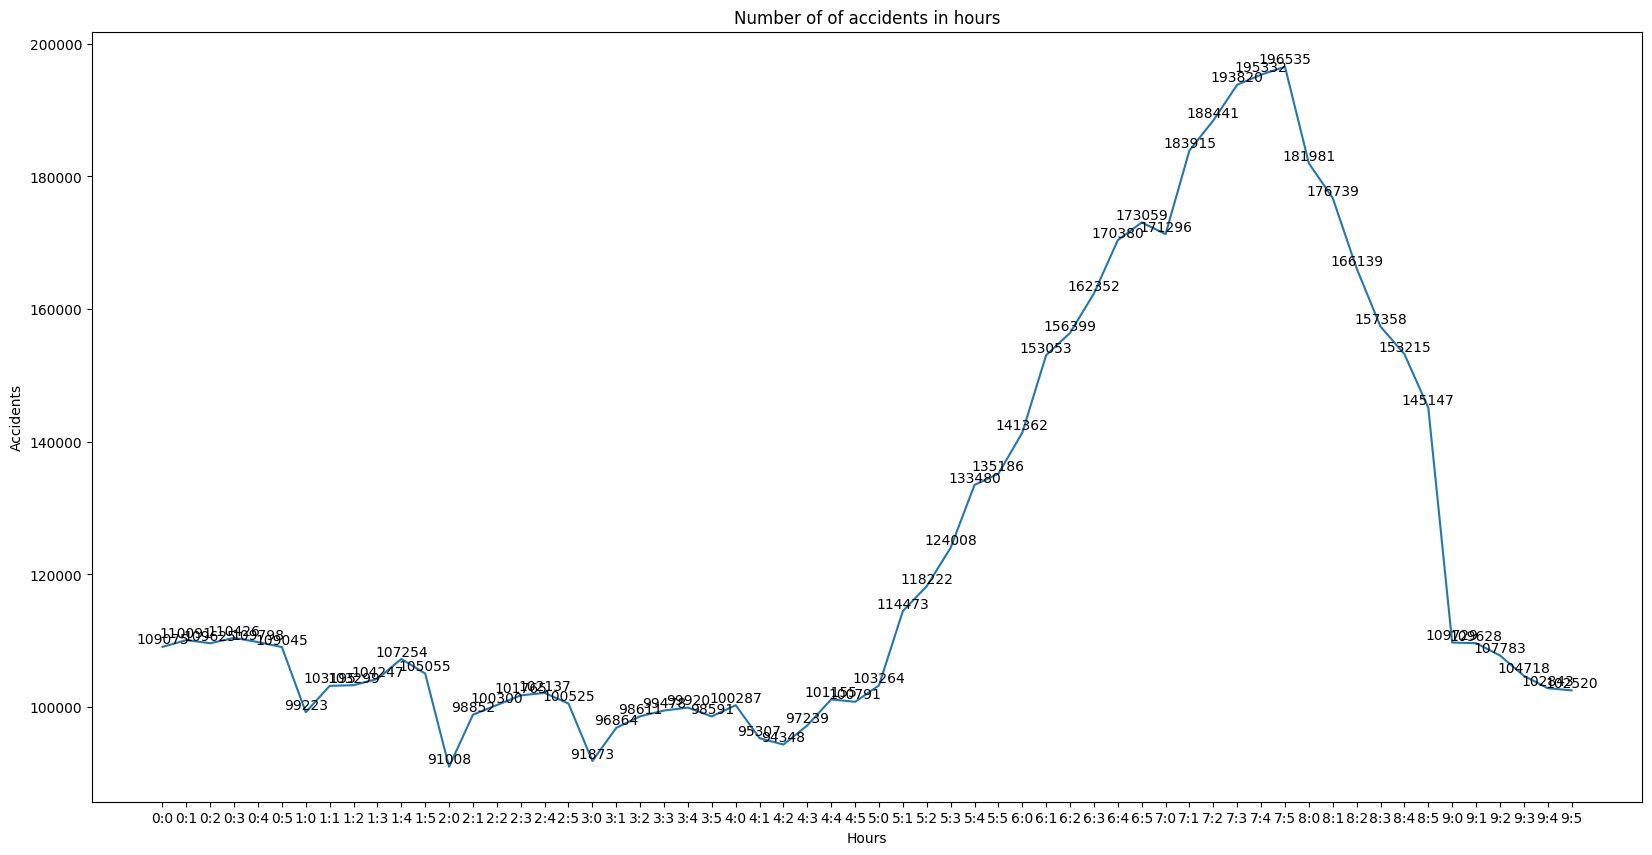

In [27]:
#visualise how many accidents in hours
# Use order to sort df13.index in sns.barplot
plt.figure(figsize=(20, 10))
ax = sns.lineplot(x=df13.index, y=df13.values)
plt.ylabel('Accidents')
plt.title("Number of of accidents in hours")
# Set x-axis ticks to show all weekdays
plt.xticks(df13.index)  
# Show data points with exact values
for x, y in zip(df13.index, df13.values):
    ax.text(x, y, str(y), ha='center', va='bottom')
plt.show()

4Pm to 9Pm has the highest accident rate


Weather_Condition
Fair                2463598
Mostly Cloudy        990247
Clear                808743
Cloudy               769429
Partly Cloudy        685487
Overcast             382866
Light Rain           336701
Scattered Clouds     204829
Light Snow           116468
Fog                   93622
Rain                  79308
Haze                  75252
Fair / Windy          33847
Heavy Rain            30929
Light Drizzle         21861
Name: Weather_Condition, dtype: int64


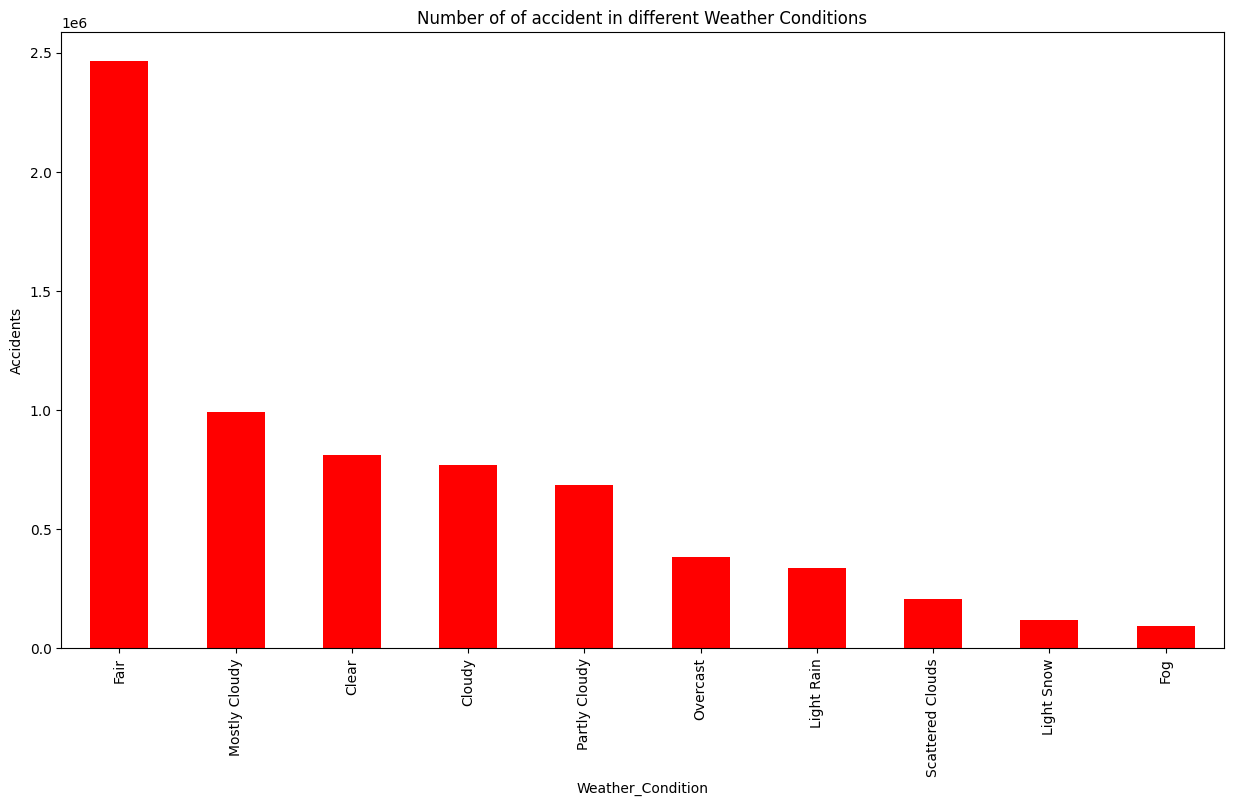

In [28]:
# how many accidents in different Weather_Condition
df15 = df.groupby(['Weather_Condition'])['Weather_Condition'].count().sort_values(ascending=False)
print(df15.head(15))
#visualise how many accidents in Weather_Condition
#select top 24 in df13
df16=df15.iloc[:10]
plt.figure(figsize=(15, 8))
df16.plot(kind='bar',color='red')
plt.ylabel('Accidents')
plt.title("Number of of accident in different Weather Conditions")
plt.show()

Clear and fair conditions result in the highest accidents.
Cloudy weather contributes significantly, accounting for around 1.35 million accidents.
Rain-related conditions cause about 100000 accidents.
Adverse Conditions (Snow, fog, haze) cause roughly 200000 accidents.

Severity
2    5917409
3    1299337
4     197649
1      67366
Name: Severity, dtype: int64


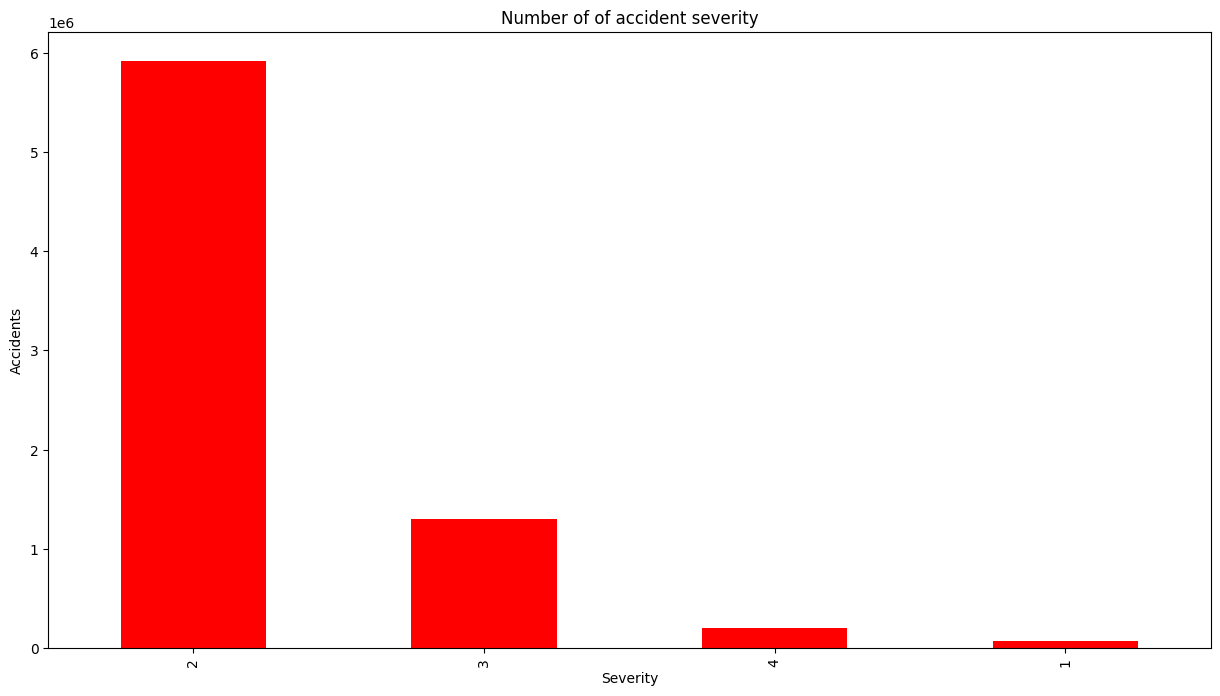

In [29]:
# how many accidents in different Severity
df17 = df.groupby(['Severity'])['Severity'].count().sort_values(ascending=False)
print(df17)
#visualise how many accidents in Severity
#select top 24 in df13
df18=df17.iloc[:10]
plt.figure(figsize=(15, 8))
df17.plot(kind='bar',color='red')
plt.ylabel('Accidents')
plt.title("Number of of accident severity")
plt.show()

Severity 2 accidents are the most common.
Severity 3 accidents are the second Largest common.

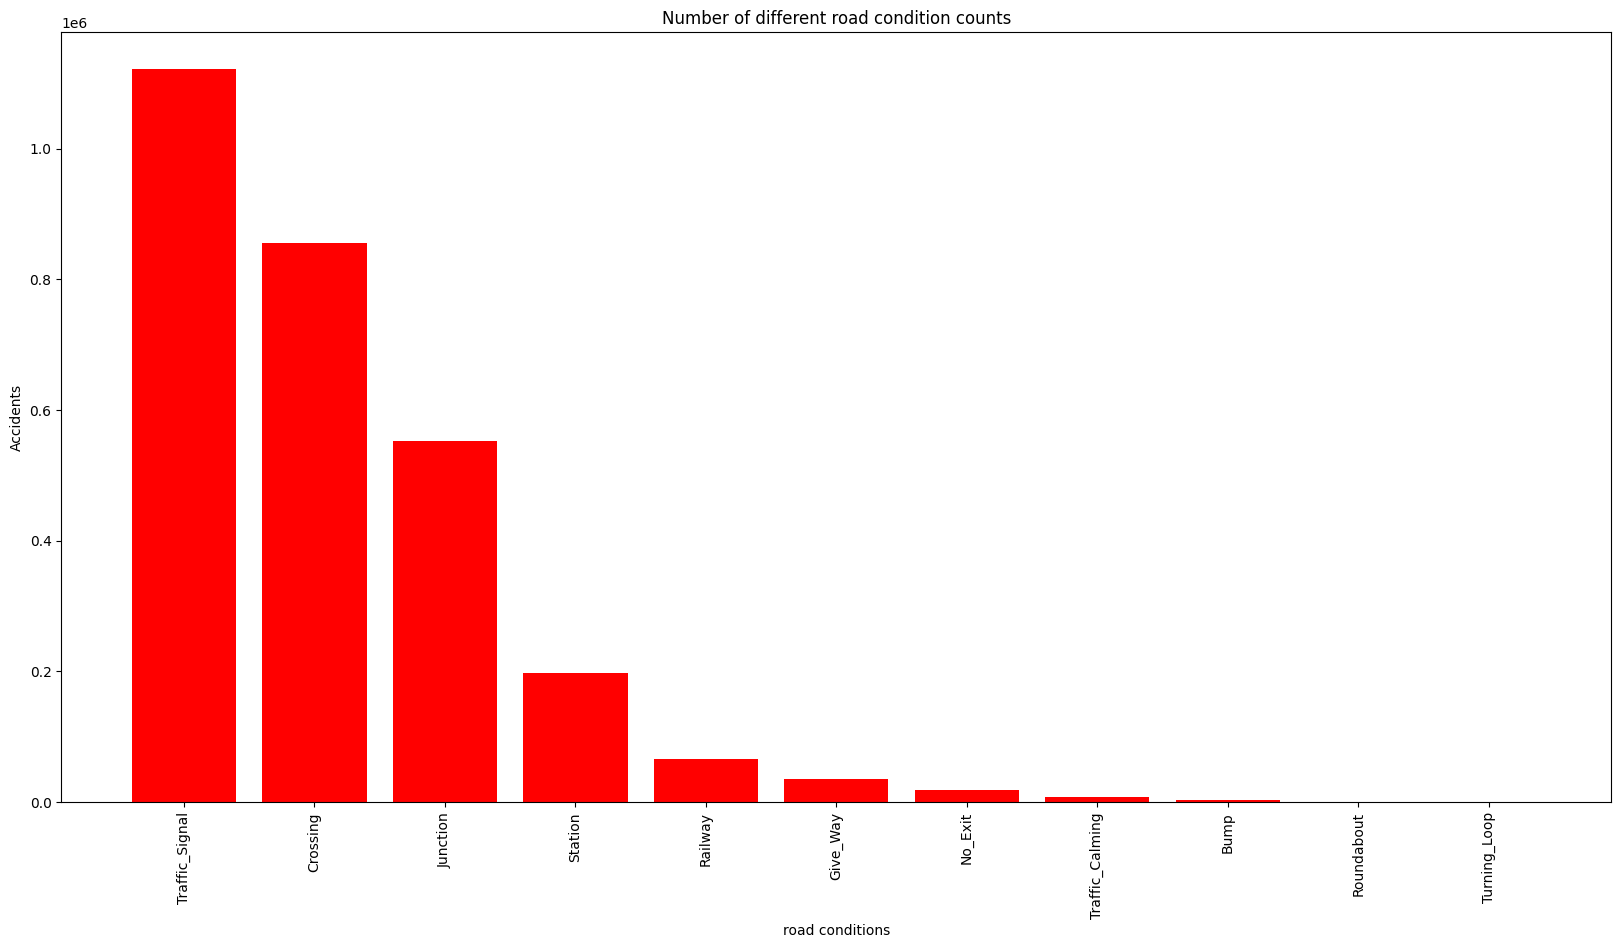

In [30]:
#Comparison of different road conditons counts

# Count the number of 'true' values in each column
columns = ['Crossing', 'Bump', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout',
           'Station', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']
true_counts = []
for column in columns:
    true_count = df[column].value_counts().get(True, 0)
    true_counts.append(true_count)

    # Sort the counts in descending order
sorted_counts = sorted(true_counts, reverse=True)
sorted_columns = [column for _, column in sorted(zip(true_counts, columns), reverse=True)]

# Create a bar chart
plt.figure(figsize=(20, 10))
plt.bar(sorted_columns, sorted_counts,color='red')
plt.xlabel('road conditions')
plt.ylabel('Accidents')
plt.title("Number of different road condition counts")
plt.xticks(rotation=90)
plt.show()

Common road accident features of traffic accidents are Traffic_Signal, crossing, junction,station and railway.

d:\Virtual_Environment_Directory\My_Playground_Environment\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


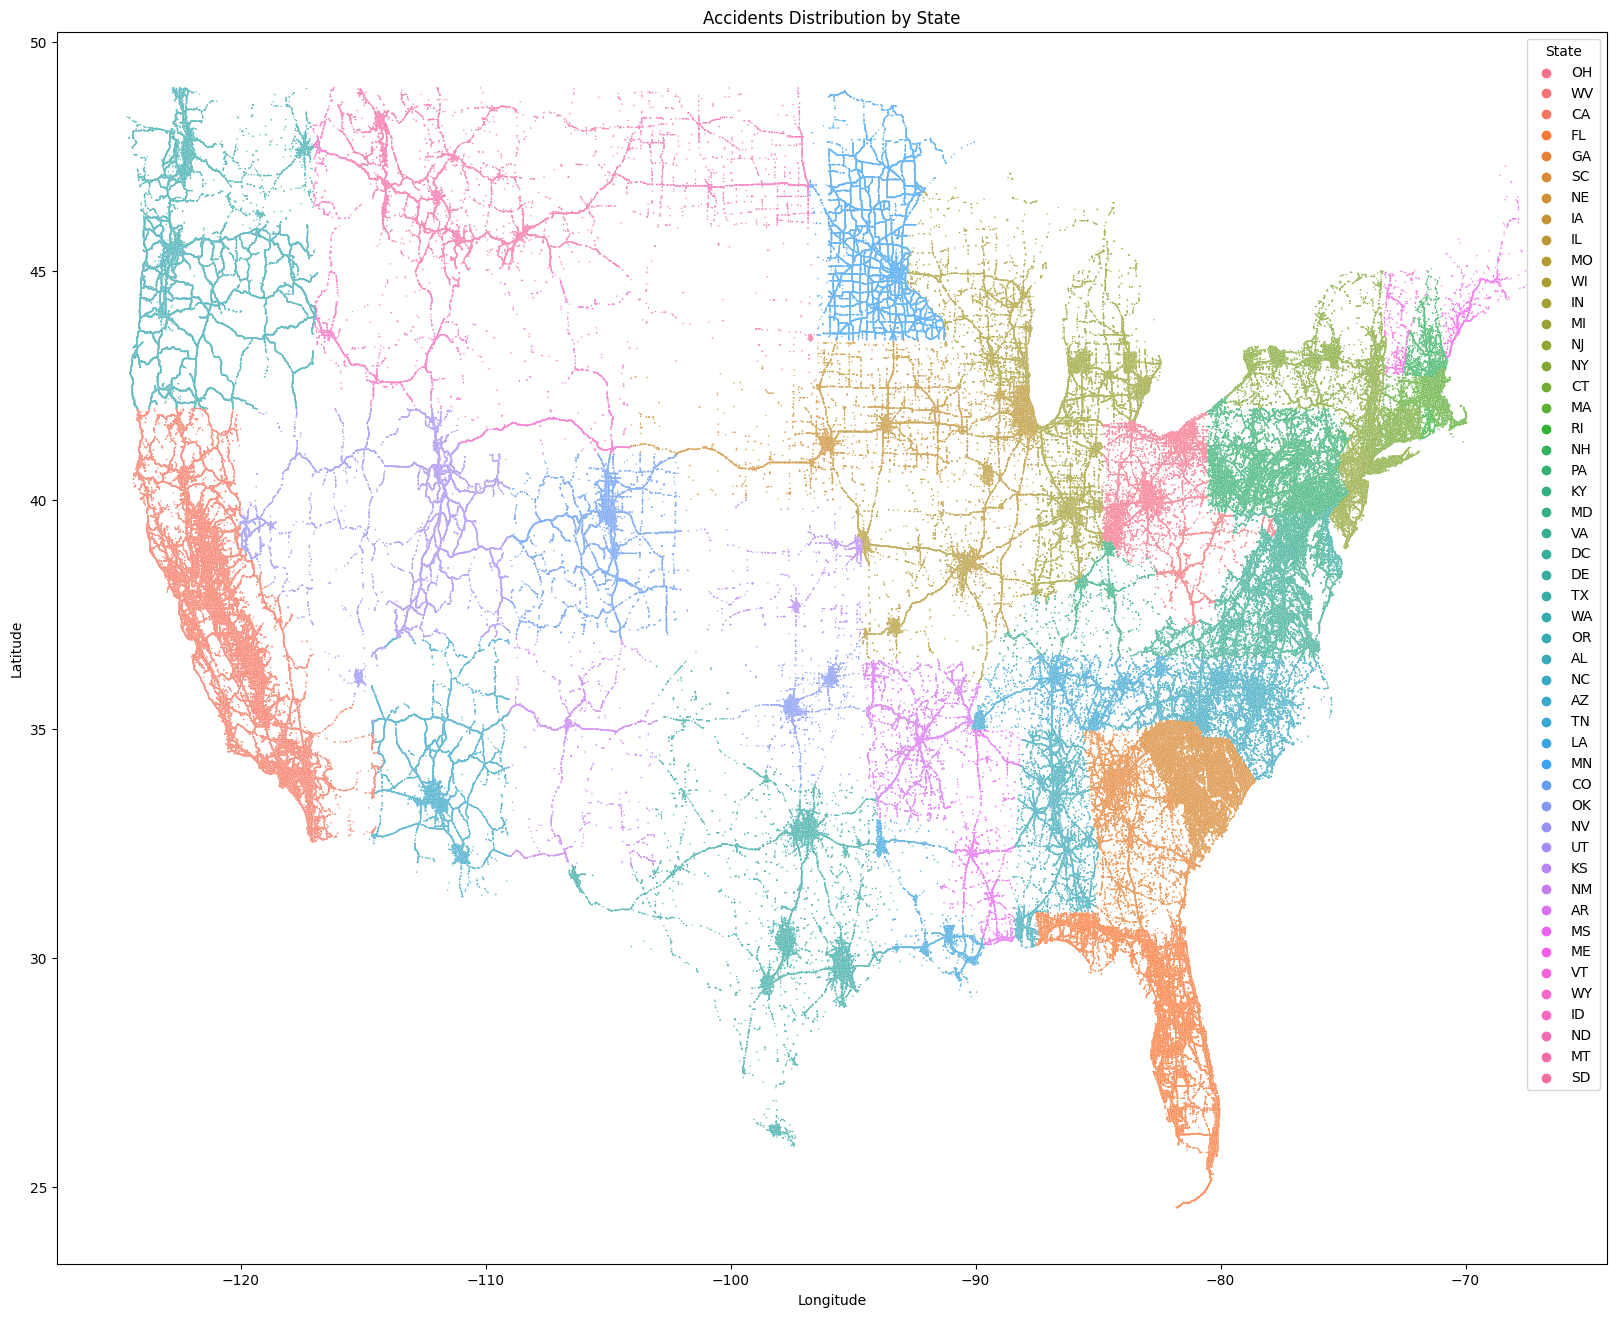

In [31]:
# Create a location scatter plot using Seaborn
plt.figure(figsize=(20, 16))
sns.scatterplot(x=df.Start_Lng, y=df.Start_Lat, hue=df.State, s=1)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Accidents Distribution by State')

# Add a legend
plt.legend(title='State')

plt.show()

In [53]:
df1=df.select_dtypes(include=['int64','float64'])

This diagram shows the western and eastern and southeast coasts, as well as regions close to the five lakes, experience a significantly higher number of accidents.

                   Severity  Start_Lat  Start_Lng   End_Lat   End_Lng  \
Severity           1.000000   0.070912   0.050323  0.086421  0.092399   
Start_Lat          0.070912   1.000000  -0.068793  0.999993 -0.126905   
Start_Lng          0.050323  -0.068793   1.000000 -0.126897  0.999999   
End_Lat            0.086421   0.999993  -0.126897  1.000000 -0.126895   
End_Lng            0.092399  -0.126905   0.999999 -0.126895  1.000000   
Distance(mi)       0.038850   0.064527   0.012552  0.069726  0.012187   
Temperature(F)    -0.028035  -0.439623  -0.014788 -0.463135  0.021743   
Wind_Chill(F)     -0.077514  -0.475721  -0.036831 -0.482956  0.004415   
Humidity(%)        0.024309   0.016958   0.184292  0.018566  0.174866   
Pressure(in)       0.042022  -0.190501   0.193089 -0.239905  0.218710   
Visibility(mi)    -0.006243  -0.083242  -0.016317 -0.108820  0.006764   
Wind_Speed(mph)    0.042005   0.031015   0.077560  0.013196  0.093573   
Precipitation(in)  0.021398   0.000173   0.028600 -

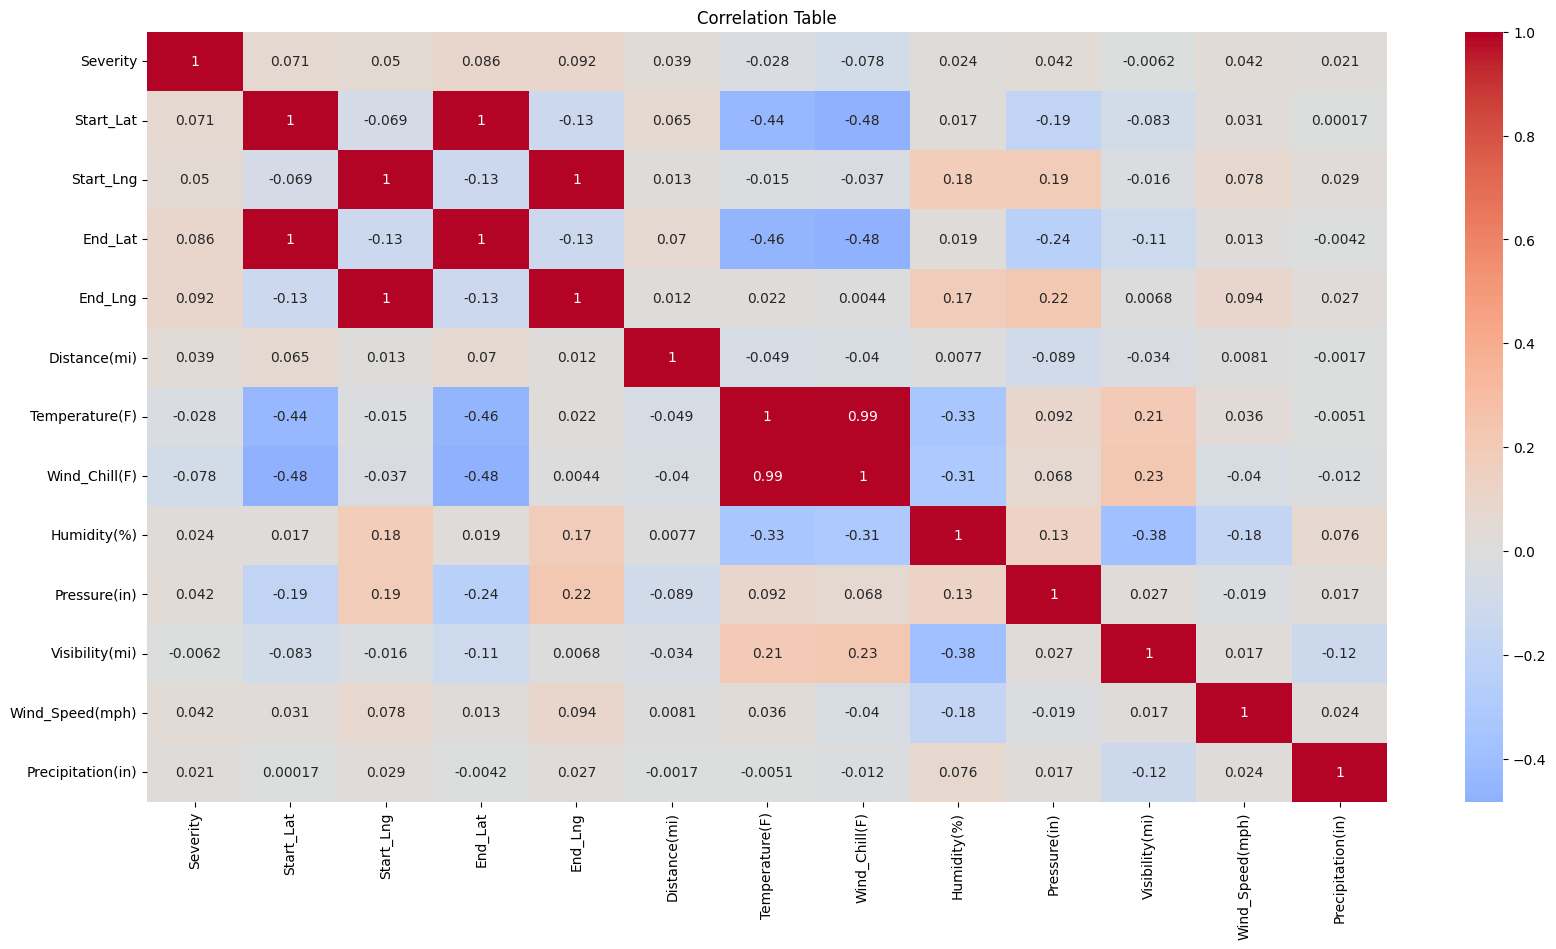

In [55]:
# Set the size
plt.figure(figsize=(20,10))  
# print(df1.corr())
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Table')
plt.show()

Temperature and Wind_Chill have a very strong positive correlation.
Traffic_Signal, Junction and Crossing seem to have a negative correlation with severity.